In [2]:
# Import most important visualization libraries

# seaborn - statistical visualization package
import seaborn as sns
# https://seaborn.pydata.org/

import matplotlib.pyplot as plt
# https://matplotlib.org/tutorials/introductory/pyplot.html

In [3]:
# Check out available datasets
print(sns.get_dataset_names())

# Can only check out all the datasets in the repo: https://github.com/mwaskom/seaborn-data

/Users/shaq/opt/anaconda3/lib/python3.7/site-packages/seaborn/utils.py:384: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 384 of the file /Users/shaq/opt/anaconda3/lib/python3.7/site-packages/seaborn/utils.py. To get rid of this warning, pass the additional argument 'features="lxml"' to the BeautifulSoup constructor.

  gh_list = BeautifulSoup(http)


['anagrams', 'anscombe', 'attention', 'brain_networks', 'car_crashes', 'diamonds', 'dots', 'exercise', 'flights', 'fmri', 'gammas', 'geyser', 'iris', 'mpg', 'penguins', 'planets', 'tips', 'titanic']


In [4]:
# Load dataset - mpg (same as R workshop)
df = sns.load_dataset('mpg')
df

# data set shows the over 300 cars, city-fuel consumption in miles per gallon 

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,usa,ford mustang gl
394,44.0,4,97.0,52.0,2130,24.6,82,europe,vw pickup
395,32.0,4,135.0,84.0,2295,11.6,82,usa,dodge rampage
396,28.0,4,120.0,79.0,2625,18.6,82,usa,ford ranger


In [5]:
# shape of data

df.shape

(398, 9)

In [6]:
# structure of the data

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    object 
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [8]:
# grouping the data types into integer + objects

df.columns.to_series().groupby(df.dtypes).groups

{dtype('int64'): Index(['cylinders', 'weight', 'model_year'], dtype='object'),
 dtype('float64'): Index(['mpg', 'displacement', 'horsepower', 'acceleration'], dtype='object'),
 dtype('O'): Index(['origin', 'name'], dtype='object')}

In [9]:
# summary of the data

df.describe()

# check for any variables with std = 0, singular values

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
count,398.000000,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050
std,7.815984,1.701004,104.269838,38.491160,846.841774,2.757689,3.697627
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000
75%,29.000000,8.000000,262.000000,126.000000,3608.000000,17.175000,79.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000


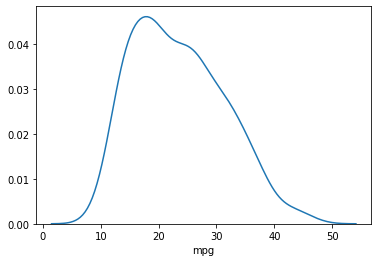

In [13]:
var = 'mpg'

# check the distribution of numerical data

sns.distplot(df[var], hist=False);

In [15]:
# check for missing data

df.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model_year      0
origin          0
name            0
dtype: int64

In [19]:
df[df.horsepower.isnull()]

# missing data treatment - how would we like to resolve this? 

# 0. Check the type of the variable 
# df.horsepower.dtypes

# 1. we can remove all columns with null values or..
# df = df[~df.horsepower.isnull()]

# 2. We can replaces with 0 or..
# df.horsepower.fillna(0, inplace=True)

# 3. We can fillna with mean
# df.horsepower.fillna(df.horsepower.mean(), inplace=True)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,usa,ford mustang gl
394,44.0,4,97.0,52.0,2130,24.6,82,europe,vw pickup
395,32.0,4,135.0,84.0,2295,11.6,82,usa,dodge rampage
396,28.0,4,120.0,79.0,2625,18.6,82,usa,ford ranger


In [24]:
df.horsepower.fillna(0, inplace=True)

In [25]:
df.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model_year      0
origin          0
name            0
dtype: int64

In [ ]:
# more advanced ways of looking at missing data ---- TO DO: COMPLETE THIS

def identify_missing(data, missing_threshold): 
    """Find the features with a fraction of missing values above `missing_threshold`"""
    # Calculate the fraction of missing in each column
    missing_series = data.isnull().sum() / data.shape[0]
    missing_stats = pd.DataFrame(
        missing_series).rename(columns={'index': 'feature',
                                             0 : 'missing_fraction'})
    # Sort with highest number of missing values on top
    missing_stats = missing_stats.sort_values('missing_fraction', ascending=False)
    # Find the columns with a missing percentage above the threshold
    record_missing = pd.DataFrame(
        missing_series[missing_series > missing_threshold]).reset_index().rename(
        columns={'index': 'feature',
                 0: 'missing_fraction'})

    to_drop = list(record_missing['feature'])

    print('%d features with greater than %0.2f missing values.\n' % (
        len(self.ops['missing']), self.missing_threshold))

In [ ]:
 def plot_missing():
        """Histogram of missing fraction in each feature"""
        if self.record_missing is None:
            raise NotImplementedError("Missing values have not been calculated. Run `identify_missing`")

        # Histogram of missing values
        plt.style.use('seaborn-white')
        plt.figure(figsize=(7, 5))
        plt.hist(self.missing_stats['missing_fraction'], bins=np.linspace(0, 1, 11), edgecolor='k', color='red',
                 linewidth=1.5)
        plt.xticks(np.linspace(0, 1, 11))
        plt.xlabel('Missing Fraction', size=14)
        plt.ylabel('Count of Features', size=14)
        plt.title("Fraction of Missing Values Histogram", size=16)